In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('datasets/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


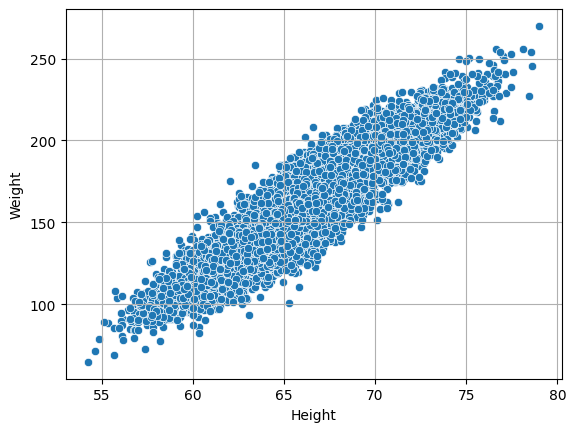

In [3]:
sns.scatterplot(data=df, x='Height',y='Weight')
plt.grid()

In [4]:
X = df.iloc[:,[1]]
y = df.iloc[:,[2]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
X_test.iloc[0]

Height    61.068054
Name: 7878, dtype: float64

In [8]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[192.58077136]])

### Let's see the linear regression line

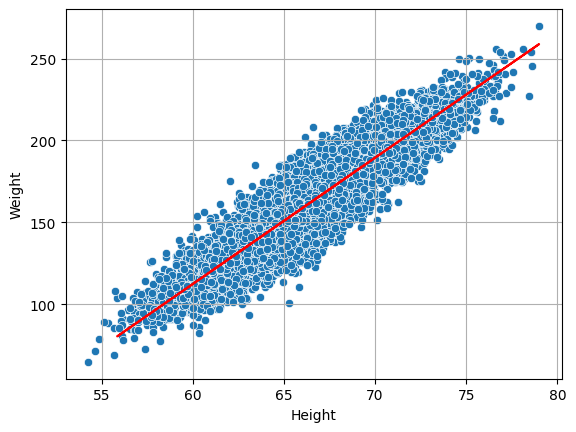

In [11]:
plt.plot(X_test, lr.predict(X_test), color='red')
sns.scatterplot(data=df,x='Height',y='Weight')
plt.grid()

#### Slope and intercept of the line regression line (y = mx + c) is 

In [15]:
m = lr.coef_
c = lr.intercept_

print(f'Slope is : {m} \nIntercept is : {c}')

Slope is : [[7.71486188]] 
Intercept is : [-350.5819479]


#### We can use this value of slope and intercept the calculate the value of y using the equation y = mx + c on our own  
For Ex. 1st value of X_test is 61.0680, putting that into the equation  
y = m*x + c  
y = 7.714 x 61.0680 + (-350.581)  
y ~ 120.497 (values will be sligthly changed as we rounded the number upto 3 digits)

In [16]:
## Prediction by our model is:
lr.predict(X_test.iloc[0].values.reshape(1,1))

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[120.54965323]])

### Now we are going to create our own Simple Linear Regeression algorithm

In [31]:
class MeraLinearRegression:
    
    def __init__(self) -> None:
        self.m = None
        self.c = None
        
    def fit(self,X_train, y_train) -> None:
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        num, den = 0,0
        num = np.sum((X_train - X_train.mean()) * (y_train - y_train.mean()))
        den = np.sum((X_train - X_train.mean())**2)
        
        self.m = num / den
        self.c = np.sum(y_train.mean() - m*X_train.mean())
        
    
    def predict(self,X_test) -> list:
        X_test = np.array(X_test)

        return X_test*self.m + self.c
    

In [32]:
mlr = MeraLinearRegression()

In [33]:
mlr.fit(X_train['Height'],y_train['Weight'])

In [36]:
mlr.predict(X_test)[0]

array([120.54965323])

The value predicted the sklearn's linear regressor and our linear regressor is exactly same as we are using their formula  
Let's run some metrics on our ml model

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [38]:
y_pred = lr.predict(X_test)

In [39]:
print('MAE : ',mean_absolute_error(y_test,y_pred))

MAE :  9.848187221583569


In [41]:
print('MSE : ',mean_squared_error(y_test,y_pred))

MSE :  151.37415841041923


In [42]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 12.303420597964585


In [44]:
r2 = r2_score(y_test, y_pred)
print('R2 score',r2)

R2 score 0.8562263885800674


In [47]:
y_test.shape[0]

2000

Adjusted R2 score is used to get rid of any irrelevant columns who are contributing into the r2 score hence making the score incorrect  
It is given by : $\frac{(1-r2)(n-1)}{(n-1-k)}$  
where n = total rows,  
k = total features


In [49]:
adjusted_r2 = 1 - ((1-r2)*(y_test.shape[0] - 1))/(y_test.shape[0] - 1 - 1)
print('Adjusted R2 score', adjusted_r2)

Adjusted R2 score 0.856154429815593


`Adjusted r2 score is same as r2 score as we only have 1 column  
This clearly defines that adjusted r2 score is used in multiple columns or in other words, for multiple linear regression`

In [3]:
import sys

print(len(sys.argv))

2
